In [ ]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA

In [11]:
%store -r dates
%store -r snow_water_equivalent
%store -r change_snow_water_equivalent
%store -r snow_depth
%store -r change_snow_depth
%store -r air_temp

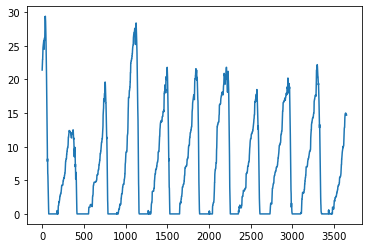

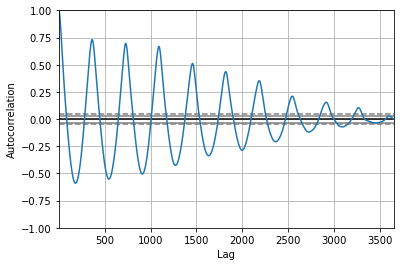

In [12]:
#print(snow_water_equivalent.head())
X = snow_water_equivalent
X.plot()
pyplot.show()

autocorrelation_plot(X)
pyplot.show()

In [6]:
model = ARIMA(snow_water_equivalent, order=(3300,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())



/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


KeyboardInterrupt: 

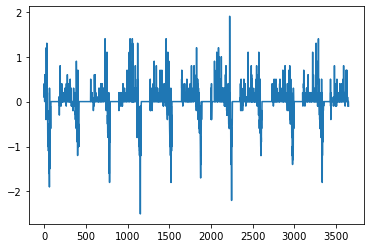

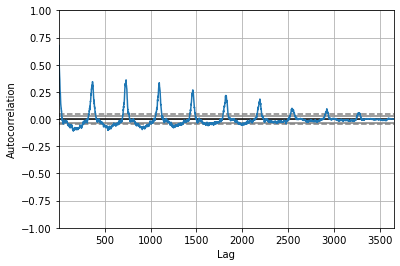

In [13]:
X = change_snow_water_equivalent
X.plot()
pyplot.show()

autocorrelation_plot(X)
pyplot.show()

                                        SARIMAX Results                                         
Dep. Variable:     Change In Snow Water Equivalent (in)   No. Observations:                 3650
Model:                                  ARIMA(10, 1, 0)   Log Likelihood                 454.635
Date:                                  Tue, 13 Apr 2021   AIC                           -887.271
Time:                                          17:05:08   BIC                           -819.047
Sample:                                               0   HQIC                          -862.974
                                                 - 3650                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4803      0.008    -58.043      0.000      -0.497

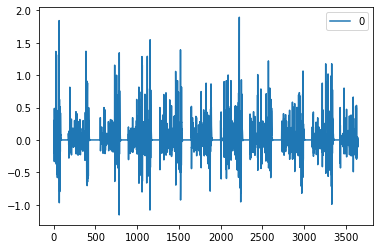

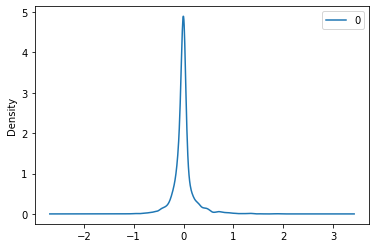

                  0
count  3.650000e+03
mean  -1.387795e-04
std    2.136331e-01
min   -1.157081e+00
25%   -6.735097e-02
50%   -2.939585e-89
75%    1.908173e-02
max    1.893293e+00


In [16]:
model = ARIMA(X, order=(10,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

Observations: 3650
Training Observations: 2409
Testing Observations: 1241


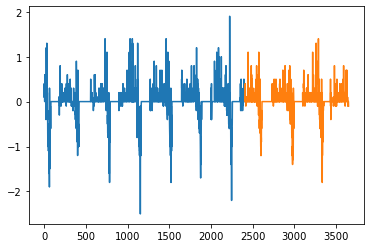

In [17]:
split = int(len(X) * 0.66)
train, test = X[0:split], X[split:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

In [ ]:
#use the station that goes furthest back in time
#keep differencing to achieve stationarity
#find the prediction power!!!